In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import Counter
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ana\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h1>1 Exploratory Data Analysis</h1>

In [5]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [6]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
print(df.dtypes)

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


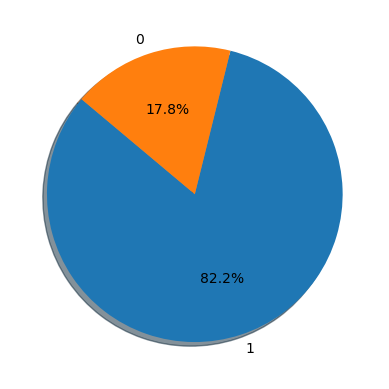

In [8]:
sentiment_count = df["Recommended IND"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<h1>2 Data Preprocessing</h1>

<h2>Dealing with NaN values</h2>

In [9]:
# Check for missing values in 'Review Text' column
print(df['Review Text'].isna().sum())

845


In [10]:
# Drop rows where 'Review Text' is NaN
df = df.dropna(subset=['Review Text'])

In [11]:
# This function cleans and standardize the input review text by performing a series of operations: 
#         converting to lowercase, 
#         replacing consecutive repeating characters, 
#         removing extra punctuation, 
#         and expanding contractions
def word_features(review):
    review = review.lower()
    review = re.sub(r'(.)\1+', r'\1\1', review)
    review = re.sub(r'[\?\.\!]+(?=[\?\.\!])', "", review)
    review = contractions.fix(review)
    return review

In [12]:
# Chapters 2.1 and 2.2 complete step b of the task: 
# b: Using the NLTK tool, perform tokenization and determine word types.

<h2>2.1 Tokenization</h2>

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
stop_words.discard('not')

In [15]:
def tokenize(review):
    token_list = [token for token in nltk.tokenize.word_tokenize(review)
        if token not in string.punctuation and token.isalpha() and not token in stop_words]

    return token_list       

In [16]:
def process_review(review):      
    review = word_features(review)
    review = tokenize(review)
    return review

In [17]:
df["tokens"] = df["Review Text"].apply(process_review)

<h2>2.2 POS tagging</h2>

In [18]:
def tag_text(tokens):
    tagged_text = nltk.pos_tag(tokens)
    return tagged_text

In [19]:
df['TaggedText'] = df['tokens'].apply(tag_text)

<h2>2.3 Extracting the most frequent nouns </h2>

In [20]:
# Next chapter copletes step c of task
# c. Extract the most frequent nouns from the text and declare them characteristics.

In [21]:
nouns = []
for doc in df['TaggedText']:
    for word, pos in doc:
        if pos == 'NN':
            nouns.append(word)

common_nouns = [item[0] for item in Counter(nouns).most_common()]

<h2>2.4 Separation of adjectives with separated nouns </h2>

Next chapter copletes step d of task </br>
d Select the adjectives that stand next to the separated nouns and pronounce them as words that express sentiment.

In [22]:
adj_with_nouns = {}
for common_noun in common_nouns:
    adj_with_nouns[common_noun] = []
    
for doc in df['TaggedText']:
    for i in range(len(doc)):
        word, pos = doc[i]
        if word in common_nouns:
            # proveriti da li su reči oko imenica pridevi
            if i > 0:
                prev_word, prev_pos = doc[i-1]
                if prev_pos == 'JJ':
                    adj_with_nouns[word].append(prev_word)
            if i < len(doc) - 1:
                next_word, next_pos = doc[i+1]
                if next_pos == 'JJ':
                    adj_with_nouns[word].append(next_word)

<h2>2.5 Creating a dictionary of sentiments </h2>

Next chapter copletes step e of task <br>
Create a sentiment dictionary

In [23]:
all_adjectives = []
for sublist in adj_with_nouns.values():
    for adj in sublist:
        all_adjectives.append(adj)

In [24]:
counter = Counter(all_adjectives)
common_adjectives = []

for item in counter.most_common():
    common_adjectives.append(item[0])

In [25]:
common_adjectives[:40]

['great',
 'top',
 'small',
 'soft',
 'little',
 'comfortable',
 'nice',
 'fit',
 'wear',
 'large',
 'perfect',
 'fabric',
 'beautiful',
 'true',
 'good',
 'much',
 'big',
 'short',
 'black',
 'petite',
 'white',
 'regular',
 'dress',
 'super',
 'casual',
 'cute',
 'gorgeous',
 'loose',
 'right',
 'high',
 'usual',
 'thin',
 'blue',
 'tight',
 'easy',
 'long',
 'overall',
 'many',
 'green',
 'different']

In [26]:
sentiment_dict = {
'great':'positive',
'top':'positive',
'small':'negative',
'soft':'positive',
'little':'positive',
'comfortable':'positive',
'nice':'positive',
'fit':'positive',
'wear':'positive',
'large':'negative',
'perfect':'positive',
'fabric':'positive',
'beautiful':'positive',
'true':'positive',
'good':'positive',
'much':'positive',
'big':'positive',
'short':'positive',
'black':'positive',
'petite':'positive',
'white':'positive',
'regular':'positive',
'dress':'positive',
'super':'positive',
'casual':'positive',
'cute':'positive',
'gorgeous':'positive',
'loose':'negative',
'right':'positive',
'high':'positive',
'usual':'positive',
'thin':'positive',
'blue':'positive',
'tight':'negative',
'easy':'positive',
'long':'positive',
'overall':'positive',
'many':'positive',
'green':'positive',
'different':'negative',
}

<h2>Sentiment prediction</h2>

In [27]:
def determine_sentiment(tagged_text, sentiment_dict):
    sentiment_score = 0
    for word, pos in tagged_text:
        if pos == 'JJ' and word in sentiment_dict:
            if sentiment_dict[word] == 'positive':
                sentiment_score += 1
            elif sentiment_dict[word] == 'negative':
                sentiment_score -= 1
    return 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'

df['Sentiment'] = df['TaggedText'].apply(lambda x: determine_sentiment(x, sentiment_dict))

In [28]:
def transform_sentiment(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return random.choice([0, 1])  # random choice between 0 and 1

# Applying the function to transform the column
df['Sentiment_binary'] = df['Sentiment'].apply(transform_sentiment)

In [29]:
y_true = df['Recommended IND']  # True labels
y_pred = df['Sentiment_binary']  # Predicted labels

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate the precision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision * 100:.2f}%')

# Calculate the recall
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall * 100:.2f}%')

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 77.28%
Precision: 82.84%
Recall: 91.14%
F1 Score: 86.79%


In [30]:
new_df = df[['Sentiment_binary', 'Review Text']]
new_df.to_csv('predicted_sentiments.csv', index=False)